undir only?

trees will ignore direction

In [137]:
import networkx as nx
import matplotlib.pyplot as plt

In [138]:

# pprims done

def prim(graph:nx.DiGraph):

    
    # initialise tree by providing first node
    minTree=nx.DiGraph()
    minTree.add_node(list(graph.nodes)[0])

    # while we have not connected all original input nodes, keep looking
    while len(minTree.nodes) < len(graph.nodes):
        edges=[]
        for edge in graph.edges.data():
            if edge[0] in minTree.nodes and edge[1] in minTree.nodes:
                # if the end nodes of the points are already in min span tree, ignore
                continue
            if edge[0] in minTree.nodes or edge[1] in minTree.nodes:
                edges.append(edge)

        # sort, for key is the third item, with value of key weight
        edges.sort(key=lambda x:x[2]['weight']) 
        # print(edges)

        # add edge with least weight
        minTree.add_edges_from([edges[0]])

    return minTree


In [139]:


# reverse delete finished
def dfs(graph:nx.DiGraph, start):
    visited=[]
    
    backlog = []
    backlog.insert(0,start)
    current=start
    while (len(backlog)!=0):


        current=backlog.pop()
        visited.append(current)
        
        
        if type(graph) == nx.Graph:
            neighbours = list(graph.neighbors(current))
        elif type(graph) == nx.DiGraph:
            neighbours = list(graph.successors(current)) + list(graph.predecessors(current))

        for neighbour in neighbours:
            if neighbour not in (visited+backlog):
                backlog.insert(0,neighbour)
    
    return visited
def isconnected(graph:nx.DiGraph):
    nodes=list(graph.nodes)
    
    startnode=nodes[0]
    if len(graph.nodes) == len(dfs(graph,startnode)):
        return True
    else:
        return False



def reverseDelete(graph:nx.DiGraph):
    edges:list = sorted(graph.edges.data(), key=lambda x: x[2]["weight"])
    edges.reverse()
    print(edges)
    finalgraph=graph.copy()

    for edge in edges:
        finalgraph.remove_edges_from([edge])
        if isconnected(finalgraph) == False:
            finalgraph.add_edges_from([edge])


    return finalgraph
        

    


In [140]:

def cyclic_nav(graph:nx.DiGraph,current,previous,branch):

    if type(graph) == nx.Graph:
        neighbours = list(graph.neighbors(current))
        neighbours.remove(previous)
    elif type(graph) == nx.DiGraph:
        neighbours = list(graph.successors(current)) + list(graph.predecessors(current))
        neighbours.remove(previous)
    # print(branch)
    
    for neighbour in neighbours:

        if neighbour in branch:
            return True
        else:
            if cyclic_nav(graph,neighbour,current,branch+[neighbour]):
                return True

    return False
def iscyclic(graph:nx.DiGraph):
    # uses cyclic dfs, FOR both dir and undir

    # if isconnected(graph) == False:
    #     return False

    start=list(graph.nodes)[0]
    
    if type(graph) == nx.Graph:
        neighbours = list(graph.neighbors(start))
    elif type(graph) == nx.DiGraph:
        neighbours = list(graph.successors(start)) +list(graph.predecessors(start))


    for neighbour in neighbours:
        if cyclic_nav(graph,neighbour,start,[start,neighbour]):
            return True
    
    

        
    
    return False


# completed
# use, undir graph
def kruskals(graph:nx.DiGraph):
    nodes=list(graph.nodes)
    edges =  sorted(graph.edges.data(), key=lambda x: x[2]["weight"])
    newgraph = nx.DiGraph()


    # keeps trying to add edges to new graph, from smallest edge up
    # if creates cycle, cannot be mst thus removes
    # if the number of edges reaches number of nodes-1, mst reached, terminate

    for edge in edges:
        newgraph.add_edges_from([edge])

        if iscyclic(newgraph):
            newgraph.remove_edges_from([edge])
            continue

        if len(newgraph.edges.data()) == len(nodes)-1:
            return newgraph
    

testing from here on

[('e', 'c', {'weight': 6}), ('e', 'f', {'weight': 6}), ('a', 'b', {'weight': 6}), ('d', 'c', {'weight': 5}), ('b', 'c', {'weight': 5}), ('a', 'd', {'weight': 5}), ('c', 'f', {'weight': 4}), ('b', 'e', {'weight': 3}), ('d', 'f', {'weight': 2}), ('a', 'c', {'weight': 1})]


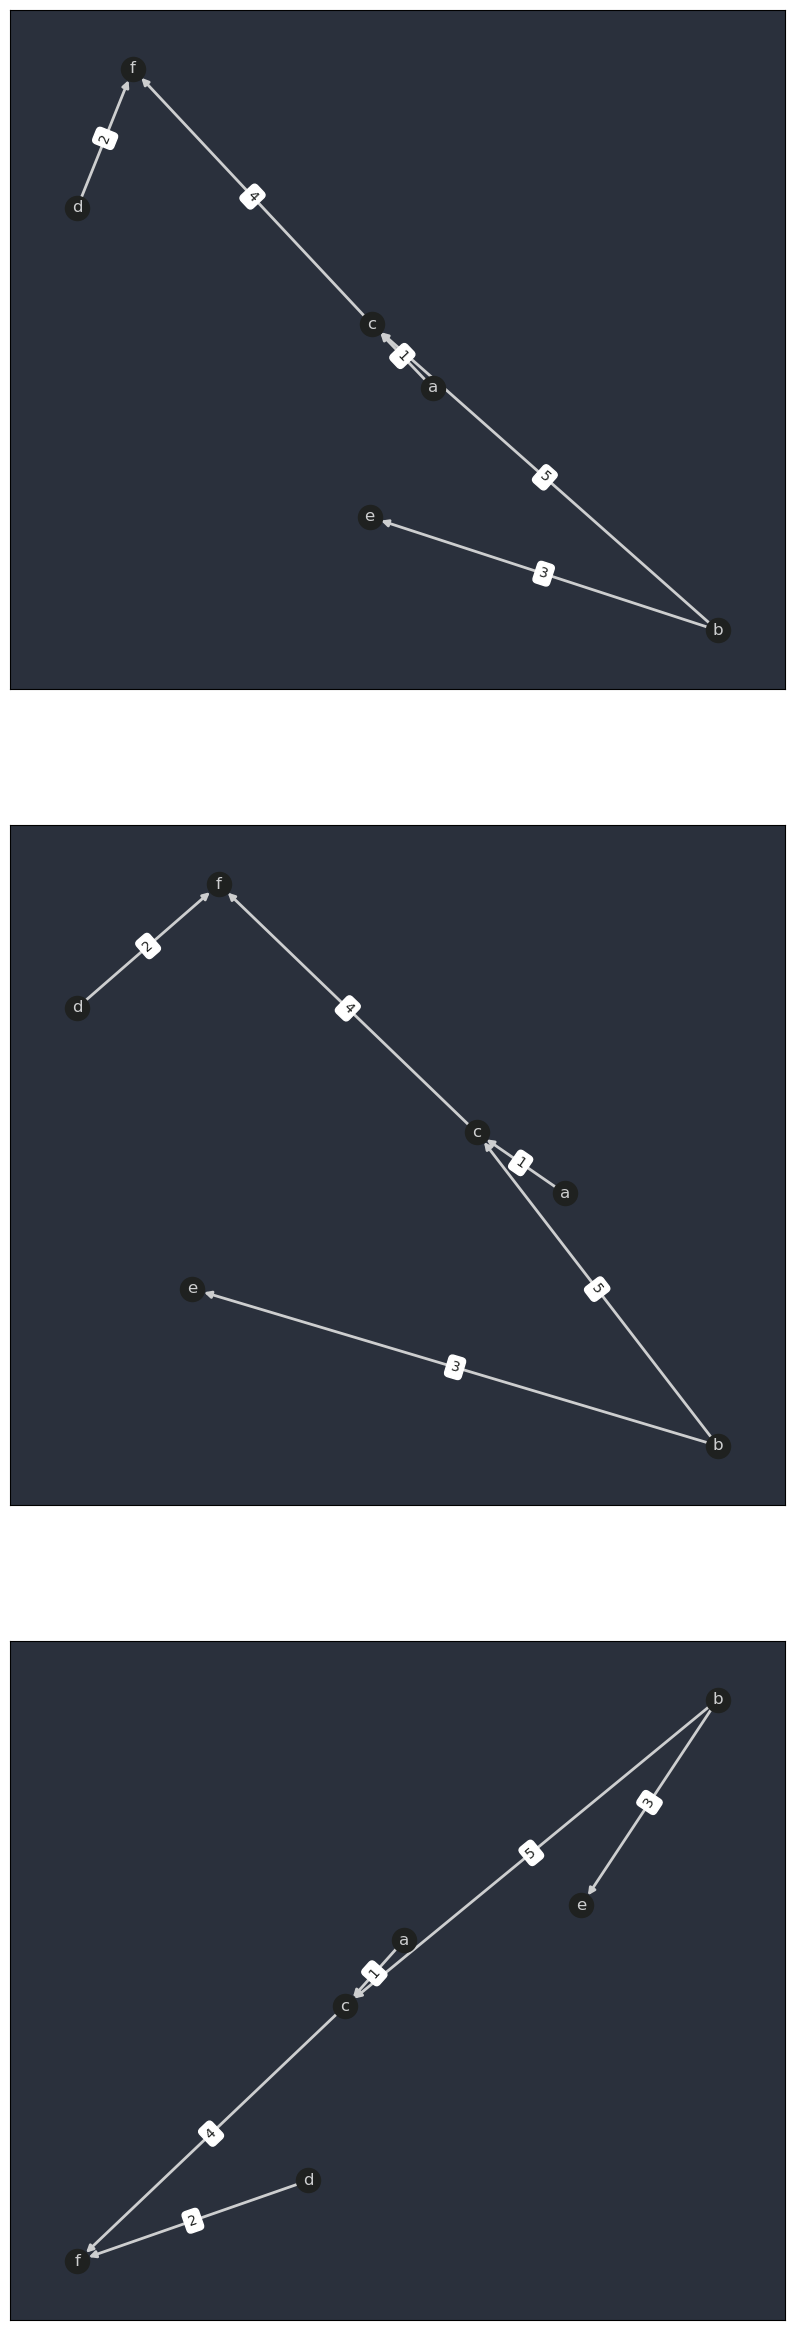

In [141]:
# testing

nodes=['a', 'b', 'c', 'd', 'e', 'f']
edges=[('a', 'b', {'weight': 6}), ('a', 'd', {'weight': 5}), ('a', 'c', {'weight': 1}), ('b', 'c', {'weight': 5}), ('d', 'c', {'weight': 5}), ('b', 'e', {'weight': 3}), ('e', 'f', {'weight': 6}), ('e', 'c', {'weight': 6}), ('c', 'f', {'weight': 4}), ('d', 'f', {'weight': 2})]


ingraph=nx.DiGraph()


ingraph.add_nodes_from(nodes)

ingraph.add_edges_from(edges)




# number of graphs
size=10
numb_graphs=3
fig, axs = plt.subplots(numb_graphs,figsize=(size,numb_graphs*size))


graphs=[]
graphs.append(kruskals(ingraph))
graphs.append(prim(ingraph))
graphs.append(reverseDelete(ingraph))


for i in range(numb_graphs):
    ax=axs[i]
    graph=graphs[i]

    pos=nx.kamada_kawai_layout(graph)




    # nodes
    nx.draw_networkx_nodes(graph,pos,node_size=300,node_color="#1f2120", node_shape="o" ,ax=ax) #  

    nx.draw_networkx_labels(graph,pos,font_color="#cdcecf",ax=ax)  #,font_size=14

    #edges

    nx.draw_networkx_edges(graph,pos,width=2,edge_color="#cdcecf",ax=ax)
    edge_labels=dict([((u,v),d["weight"]) for u,v,d in graph.edges(data=True)])

    nx.draw_networkx_edge_labels(graph,pos,edge_labels=edge_labels,font_color="#1f2120",ax=ax)
    #other

    ax.set_facecolor("#2a303c")

    # plt.axis('off')
    # plt.savefig("test.png", bbox_inches="tight", pad_inches=0.0)
plt.show()



